## Day 13: A Maze of Twisty Little Cubicles

https://adventofcode.com/2016/day/13

In [86]:
WALL = 1
EMPTY = 0

def isWall(c,odfn=10):
    x,y = c
    v = x*x + 3*x + 2*x*y + y + y*y + odfn
    if (bin(v)[2:].count("1"))%2==0:
        return EMPTY
    else:
        return WALL
    
import numpy as np

def makeMaze(size,odfn):
    maze = np.zeros((size,size),dtype=int)
    for x in range(size):
        for y in range(size):
            c = (x,y)
            maze[y,x] = isWall(c,odfn)
    return maze

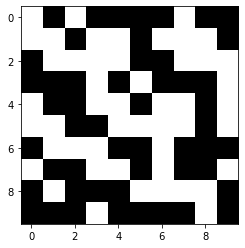

In [87]:
import matplotlib.pyplot as plt

maze = makeMaze(size=10,odfn=10)

plt.imshow(maze,cmap="binary")

In [88]:
import numpy as np
from queue import Queue

WALL    = 1
VISITED = 3

## Coordinates for a given position are encoded as (x,y) tuple
def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def BFS(start, end, theMaze):
    '''Find shorter path between two position in the maze using BFS algorithm'''
    maze = np.copy(theMaze)
    ymax,xmax = maze.shape
    queue = Queue()
    queue.put([start]) # wrap the starting cell tuple in a list
    lenmax = 1
    while not queue.empty():
        path = queue.get() # get a path form the paths' queur
        c = path[-1] # take last step of current path
        if c == end:
            return path
        for a in getAdjacent(c): # explore adjacent cells
            x,y = a
            # protection against maze boundaries
            if x<0 or x>=xmax or y<0 or y>=ymax:
                continue
            if maze[y][x] == WALL or maze[y][x] == VISITED: # if a dead end is reached (all WALL or VISITED) path gets dequeued
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path) # store back the path in the queue with the new step
    #print("END position not reachable")
    return []

In [89]:
start = (1,1)
end = (7,4)
path = BFS(start,end,maze)
print(len(path)-1)

11


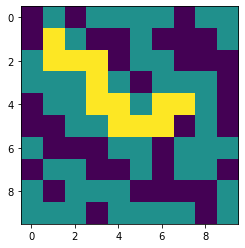

In [90]:
for x,y in path:
    maze[y,x] = 2
plt.imshow(maze)

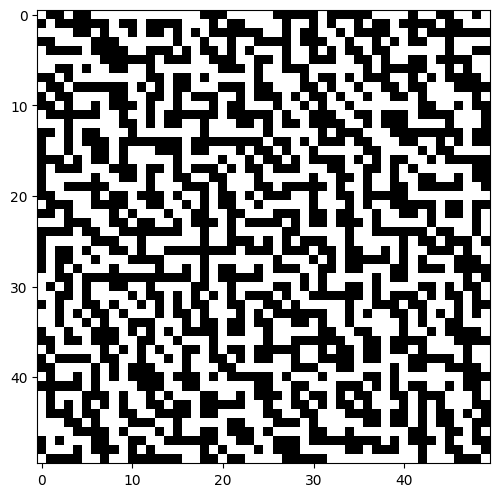

In [94]:
odfn = 1352
size = 50

maze = makeMaze(size,odfn)

fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(maze,cmap="binary")

In [95]:
start = (1,1)
end = (31,39)
path = BFS(start,end,maze)
print(len(path)-1)

90


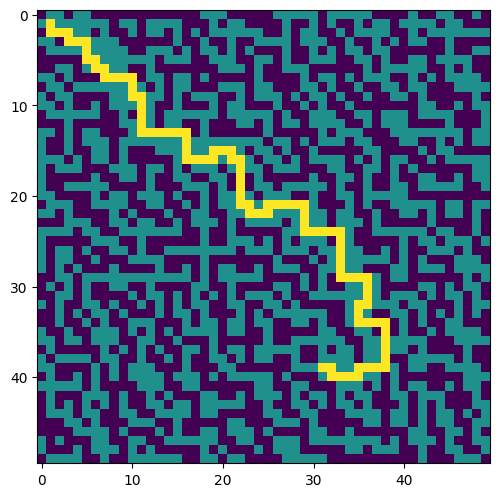

In [96]:
for x,y in path:
    maze[y,x] = 2
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(maze)

In [97]:
odfn = 1352
size = 30

maze = makeMaze(size,odfn)

reachable = []
for x in range(size):
    for y in range(size):
        start = (1,1)
        end = (x,y)
        path = BFS(start,end,maze)
        if len(path)==0: # not reachables
            continue
        if len(path)-1 <=50:
            reachable.append(end)
print(len(reachable))

135


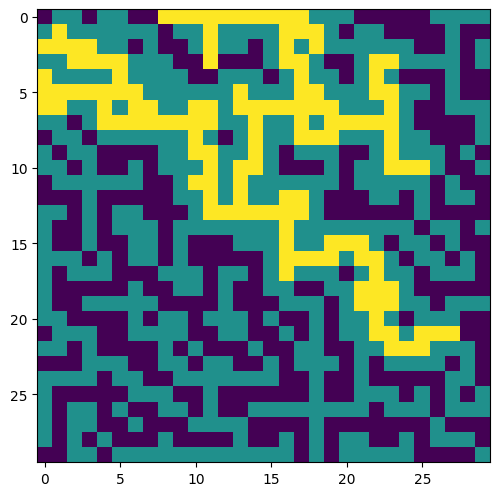

In [98]:
for x,y in reachable:
    maze[y,x] = 2
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(maze)